In [1]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 將影像features轉換為4維矩陣
(x_Train,y_train),(x_Test,y_Test) = mnist.load_data()
x_TrainTo4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_TestTo4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [3]:
# 將影像features標準化
x_TrainTo4D_Normalize = x_TrainTo4D / 255
x_TestTo4D_Normalize = x_TestTo4D /255

In [4]:
# 將label做One Hot encode轉換
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()
# 建立卷積層1
model.add(Conv2D(filters=16, # filters :濾鏡數量
                 kernel_size=(5,5), # kernel_size :濾鏡大小
                 padding='same', #補0策略，使捲積的大小不變
                 input_shape=(28,28,1), #28*28*1的單色照片維度(長,寬,深)
                 activation='relu'))
# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2))) #pool_size:把輸入張量的兩個維度都縮小一半 => 14*14*1

# 建立卷積層2
model.add(Conv2D(filters=36, # filters :濾鏡數量
                 kernel_size=(5,5), # kernel_size :濾鏡大小
                 padding='same', #補0策略，使捲積的大小不變
                 activation='relu'))
# 建立池化層2
model.add(MaxPooling2D(pool_size=(2,2))) #pool_size:把輸入張量的兩個維度都縮小一半 => 7*7*1

model.add(Dropout(0.25)) #每次迭代放棄25%的神經元

# 建立平坦層
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5)) #每次迭代放棄50%的神經元

model.add(Dense(10,activation='softmax'))

print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [6]:
# 模型訓練設定
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
train_history = model.fit(x=x_TrainTo4D_Normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=100,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 41s - loss: 0.3230 - acc: 0.9012 - val_loss: 0.0684 - val_acc: 0.9801
Epoch 2/10
 - 40s - loss: 0.1050 - acc: 0.9687 - val_loss: 0.0503 - val_acc: 0.9842
Epoch 3/10
 - 39s - loss: 0.0775 - acc: 0.9765 - val_loss: 0.0432 - val_acc: 0.9872
Epoch 4/10
 - 39s - loss: 0.0654 - acc: 0.9804 - val_loss: 0.0362 - val_acc: 0.9892
Epoch 5/10
 - 40s - loss: 0.0535 - acc: 0.9834 - val_loss: 0.0353 - val_acc: 0.9899
Epoch 6/10
 - 40s - loss: 0.0492 - acc: 0.9848 - val_loss: 0.0349 - val_acc: 0.9898
Epoch 7/10
 - 39s - loss: 0.0437 - acc: 0.9867 - val_loss: 0.0314 - val_acc: 0.9905
Epoch 8/10
 - 39s - loss: 0.0375 - acc: 0.9883 - val_loss: 0.0309 - val_acc: 0.9919
Epoch 9/10
 - 39s - loss: 0.0349 - acc: 0.9895 - val_loss: 0.0298 - val_acc: 0.9919
Epoch 10/10
 - 39s - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0305 - val_acc: 0.9914


In [8]:
def show_train_history(train_history,train,validation,title):
    plt.plot(train_history.history[train]) #acc
    plt.plot(train_history.history[validation]) #val_acc
    plt.title('Train History ('+ title + ')')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train (acc)','validation (val_acc)'],
               loc='lower right')

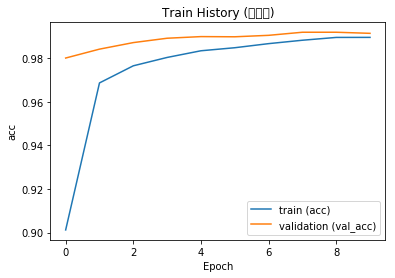

In [9]:
show_train_history(train_history,'acc','val_acc','準確率')

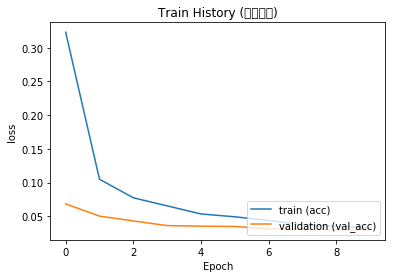

In [10]:
show_train_history(train_history,'loss','val_loss','損失函數')

In [11]:
#使用測試資料，測試模型準確率
scores = model.evaluate(x_TestTo4D_Normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 302us/step


0.99250000000000005

In [12]:
prediction = model.predict_classes(x_TestTo4D_Normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

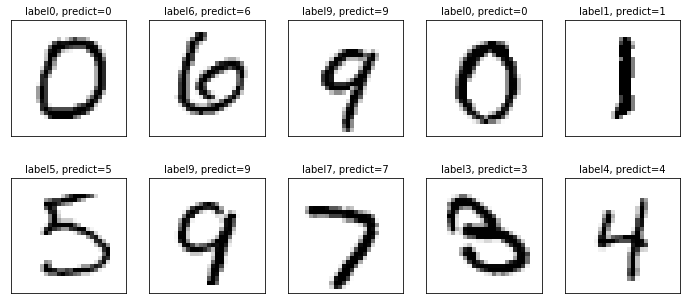

In [13]:
#對照模型預測的結果
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #設定顯示圖形大小
    if num>25: num =25 #顯示的資料筆數，上限為25
    for i in range(0,num):
        ax =plt.subplot(5,5,1+i) #建立子圖形有五行五列
        ax.imshow(images[idx], cmap='binary')
        title = "label" + str(labels[idx]) #建立子圖形title之標籤欄位
        if len(prediction)>0: #假如有傳入預測結果
            title += ", predict=" + str(prediction[idx]) #子圖形title加入預測結果
        ax.set_title(title,fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx+=1 #讀取下一筆
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=10)

In [14]:
# 建立混淆矩陣
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,3,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,0,2,1029,0,0,0,0,1,0,0
3,0,1,1,1004,0,3,0,0,1,0
4,0,0,0,0,979,0,1,0,0,2
5,1,0,0,1,0,889,1,0,0,0
6,3,3,0,0,1,1,949,0,1,0
7,0,3,8,0,2,0,0,1011,1,3
8,3,0,3,1,1,1,0,0,963,2


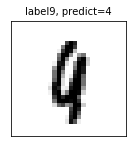

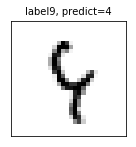

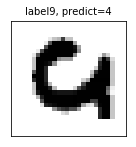

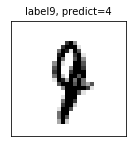

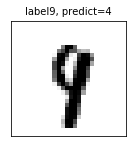

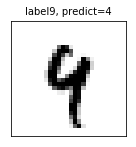

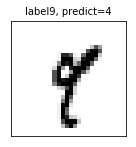

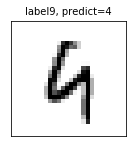

In [15]:
#建立真實值&預測DataFrame
df = pd.DataFrame({'label':y_Test,'predict':prediction})
temp_df = df[(df.label==9)&(df.predict==4)]
error_list = temp_df.index.tolist()
for index,item in enumerate(error_list):
    plot_images_labels_prediction(x_Test,y_Test,prediction,idx= item,num=1)